<a href="https://colab.research.google.com/github/HakureiPOI/Modeling_Allowance/blob/main/GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [2]:
class GeneticAlgorithm():
    def __init__(self, obj_function, dim, bounds, pop_size=256, max_iter=100, crossover_rate=0.8, mutation_rate=0.1, minimize=True):
        """初始化遗传算法"""
        self.obj_function = obj_function
        self.dim = dim
        self.bounds = bounds
        self.pop_size = pop_size
        self.max_iter = max_iter
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.minimize = minimize

        self.population = np.random.uniform(0, 1, (pop_size, dim))
        self.best_individual = None
        self.best_score = float('inf') if minimize else float('-inf')
        self.history = []

    def _evaluate_fitness(self, population):
        """评估种群中每个个体的适应度"""
        original_positions = population * (np.array([b[1] for b in self.bounds]) - np.array([b[0] for b in self.bounds])) + np.array([b[0] for b in self.bounds])
        fitness = np.array([self.obj_function(pos) for pos in original_positions])
        return fitness if self.minimize else -fitness

    def _select_parents(self, fitness):
        """基于轮盘赌选择父代"""
        probabilities = fitness / fitness.sum()
        indices = np.random.choice(np.arange(self.pop_size), size=self.pop_size, p=probabilities)
        return self.population[indices]

    def _crossover(self, parents):
        """多点交叉操作"""
        offspring = parents.copy()
        for i in range(0, self.pop_size, 2):
            if np.random.rand() < self.crossover_rate:
                points = np.sort(np.random.choice(range(1, self.dim), size=2, replace=False))
                offspring[i, points[0]:points[1]], offspring[i + 1, points[0]:points[1]] = \
                    offspring[i + 1, points[0]:points[1]], offspring[i, points[0]:points[1]]
        return offspring

    def _mutate(self, offspring):
        """执行变异操作"""
        for i in range(self.pop_size):
            for j in range(self.dim):
                if np.random.rand() < self.mutation_rate:
                    offspring[i, j] += np.random.uniform(-0.1, 0.1)
                    offspring[i, j] = np.clip(offspring[i, j], 0, 1)
        return offspring

    def optimize(self, early_stopping_rounds=10, tolerance=1e-6, elite_size=1):
        """运行优化过程，支持提前停止和精英保留"""
        no_improve_counter = 0

        for iteration in range(self.max_iter):
            fitness = self._evaluate_fitness(self.population)
            sorted_indices = np.argsort(fitness) if self.minimize else np.argsort(-fitness)

            # 更新全局最优解
            best_idx = sorted_indices[0]
            if (self.minimize and fitness[best_idx] < self.best_score) or (not self.minimize and fitness[best_idx] > self.best_score):
                self.best_score = fitness[best_idx]
                self.best_individual = self.population[best_idx].copy()
                no_improve_counter = 0  # 重置计数器
            else:
                no_improve_counter += 1

            self.history.append(self.best_score)

            # 提前停止逻辑
            if no_improve_counter >= early_stopping_rounds:
                print(f"优化在第 {iteration + 1} 代提前停止，当前最优适应度: {self.best_score}")
                break

            # 精英保留
            elites = self.population[sorted_indices[:elite_size]]

            # 选择、交叉、变异
            parents = self._select_parents(1 / (1 + fitness))  # 最小化问题适配
            offspring = self._crossover(parents)
            offspring = self._mutate(offspring)

            # 替换种群
            self.population = np.vstack((elites, offspring[:-elite_size]))

            print(f"第 {iteration + 1}/{self.max_iter} 代, 当前最优适应度: {self.best_score}")

        original_best = self.best_individual * (np.array([b[1] for b in self.bounds]) - np.array([b[0] for b in self.bounds])) + np.array([b[0] for b in self.bounds])
        return original_best, self.best_score

    def plot_optimization_history(self):
        sns.set(style="whitegrid")
        plt.figure(figsize=(10, 6))
        plt.plot(self.history, label="Best Fitness", color="b")
        plt.xlabel("Iteration")
        plt.ylabel("Best Fitness")
        plt.title("Optimization History")
        plt.legend()
        plt.show()

    def visualize_positions(self):
        """可视化种群的二维分布"""
        tsne = TSNE(n_components=2, random_state=42)
        positions_2d = tsne.fit_transform(self.population)

        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        plt.scatter(positions_2d[:, 0], positions_2d[:, 1], s=20, alpha=0.7)
        plt.xlabel("Dimension 1")
        plt.ylabel("Dimension 2")
        plt.title("Population Distribution (t-SNE)")
        plt.show()

In [3]:
def complex_function(x):
    # x 是目标函数的变量列表
    return sum((1 - x[:-1])**2 + 100 * (x[1:] - x[:-1]**2)**2)

In [4]:
dim = 10
bounds = [(-5, 5)] * dim  # 每个维度不同的边界
ga = GeneticAlgorithm(obj_function=complex_function, dim=dim, bounds=bounds)

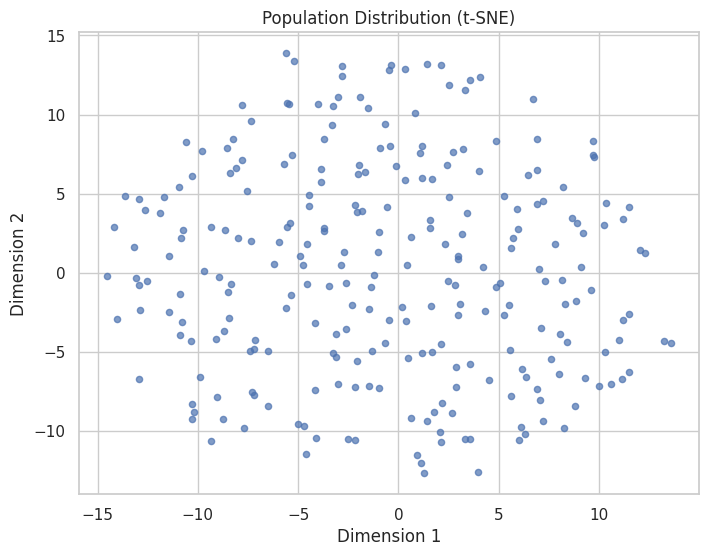

In [5]:
ga.visualize_positions()

In [6]:
best_position, best_score = ga.optimize()

第 1/100 代, 当前最优适应度: 13955.737063413904
第 2/100 代, 当前最优适应度: 13593.168271512433
第 3/100 代, 当前最优适应度: 4470.950858424538
第 4/100 代, 当前最优适应度: 2961.474365485208
第 5/100 代, 当前最优适应度: 1901.0289749794758
第 6/100 代, 当前最优适应度: 1407.8008746819505
第 7/100 代, 当前最优适应度: 1017.3379742931074
第 8/100 代, 当前最优适应度: 806.5331628760955
第 9/100 代, 当前最优适应度: 722.6155091047746
第 10/100 代, 当前最优适应度: 441.2025067674533
第 11/100 代, 当前最优适应度: 441.2025067674533
第 12/100 代, 当前最优适应度: 334.47193005699205
第 13/100 代, 当前最优适应度: 334.47193005699205
第 14/100 代, 当前最优适应度: 270.15024157656245
第 15/100 代, 当前最优适应度: 245.76879556012574
第 16/100 代, 当前最优适应度: 245.76879556012574
第 17/100 代, 当前最优适应度: 195.32741440193786
第 18/100 代, 当前最优适应度: 181.41915925822283
第 19/100 代, 当前最优适应度: 108.34094503674545
第 20/100 代, 当前最优适应度: 38.489447438496306
第 21/100 代, 当前最优适应度: 38.489447438496306
第 22/100 代, 当前最优适应度: 31.880968316698866
第 23/100 代, 当前最优适应度: 29.064437895289927
第 24/100 代, 当前最优适应度: 29.064437895289927
第 25/100 代, 当前最优适应度: 25.785922857152304
第 26/100 代, 当前最

In [7]:
print(f"最优位置: {best_position}")
print(f"最优适应度: {best_score}")

最优位置: [ 0.84949034  0.71354742  0.51493563  0.28928089  0.11379277  0.03115738
  0.00798453 -0.00387627 -0.00488217  0.01267889]
最优适应度: 5.787558909481861


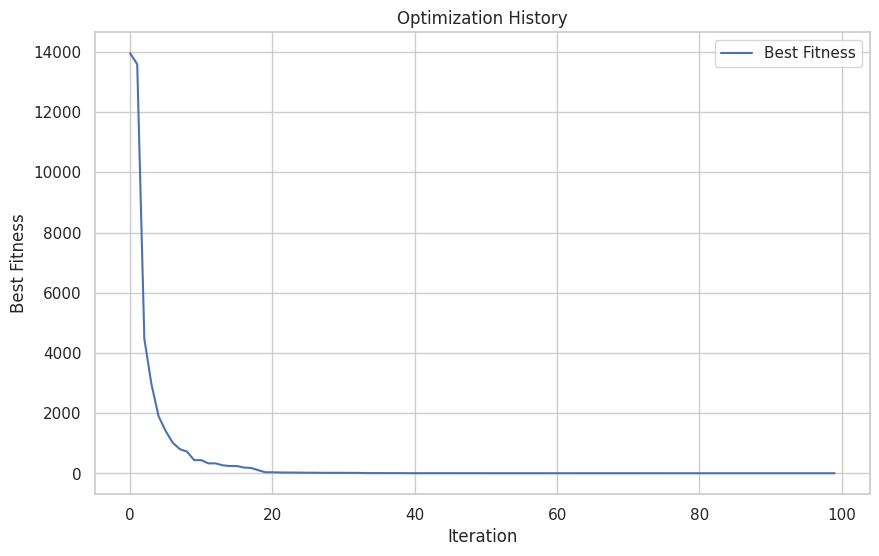

In [8]:
ga.plot_optimization_history()

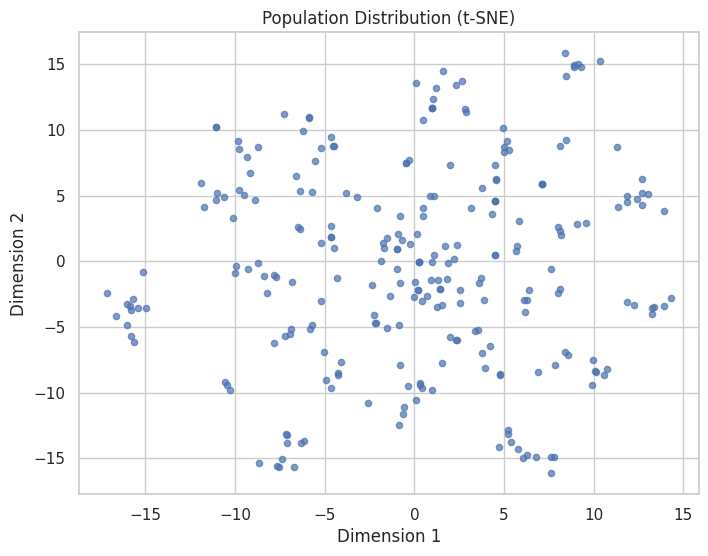

In [9]:
ga.visualize_positions()